# **自然言語・可視化・分析ライブラリ**
Word Cloud、nlplot（頻出ワードグラフや共起ネットワーク等の可視化や分析）、TF-IDF計算、word2vecによるワードのベクトル計算と可視化（PCAとT-SNE）を実行します。\
分析したい文書をテキストファイルに貼って読み込ませ、「ランタイム→すべてのセルを実行」するだけです。\
前処理（改行, 空白等の処理）→形態素分析→各種視覚化は自動で行います。
- [**注意**] テキストファイル名は「sample.txt」としてください。
- [**注意**] テキストファイルは文字コードを「UTF-8」としてください。

# **ライブラリのインストール**

In [ ]:
pip install nlplot

In [ ]:
#日本語フォントをインストール
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-18ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
#Mecabのインストール
!pip install mecab-python3==0.996.5

In [ ]:
from pathlib import Path
import pandas as pd
import re
import MeCab
import matplotlib.pyplot as plt

# **テキストファイル & ストップワード指定**
- Word Cloudに表示したくないワードがあれば、任意に追加してください。

In [ ]:
#テキストファイル名を指定（※textファイルの文字コードは「UTF-8」としてください）
filename = 'sample.txt'

In [ ]:
#ストップワード設定
stop_words = ["し", "い", "ある", "おる", "せる", "ない", "いる", "する", "の", "よう", "なる", "それ", "そこ", "これ", "こう", "ため", "そう", "れる", "られる"]

# **モジュール構築**
- 前処理（改行や空白の処理、センテンス化）や形態素分析、ワード出現回数処理を行います。
- 文章をワードに分解後、一般名詞・動詞・形容詞（動詞と形容詞は基礎型）のみを取り出しています。（※追加や変更はコード操作が必要です）


In [ ]:
with open(filename, 'r', encoding='utf-8') as file:
    lines = file.readlines()

lines = [l.strip() for l in lines]

sentences = []
for sentence in lines:
    texts = sentence.split('。')
    sentences.extend(texts)

In [ ]:
with open(filename, 'r', encoding='utf-8') as all:
    all_text = all.readlines()

all_text = [l.strip() for l in all_text]

all_text = ''.join(all_text)
all_text

'初編「天は人の上に人を造らず人の下に人を造らず」と言えり。されば天より人を生ずるには、万人は万人みな同じ位にして、生まれながら貴賤上下の差別なく、万物の霊たる身と心との働きをもって天地の間にあるよろずの物を資り、もって衣食住の用を達し、自由自在、互いに人の妨げをなさずしておのおの安楽にこの世を渡らしめ給うの趣意なり。されども今、広くこの人間世界を見渡すに、かしこき人あり、おろかなる人あり、貧しきもあり、富めるもあり、貴人もあり、下人もありて、その有様雲と泥との相違あるに似たるはなんぞや。その次第はなはだ明らかなり。『実語教』に、「人学ばざれば智なし、智なき者は愚人なり」とあり。されば賢人と愚人との別は学ぶと学ばざるとによりてできるものなり。また世の中にむずかしき仕事もあり、やすき仕事もあり。そのむずかしき仕事をする者を身分重き人と名づけ、やすき仕事をする者を身分軽き人という。すべて心を用い、心配する仕事はむずかしくして、手足を用うる力役はやすし。ゆえに医者、学者、政府の役人、または大なる商売をする町人、あまたの奉公人を召し使う大百姓などは、身分重くして貴き者と言うべし。身分重くして貴ければおのずからその家も富んで、下々の者より見れば及ぶべからざるようなれども、その本を尋ぬればただその人に学問の力あるとなきとによりてその相違もできたるのみにて、天より定めたる約束にあらず。諺にいわく、「天は富貴を人に与えずして、これをその人の働きに与うるものなり」と。されば前にも言えるとおり、人は生まれながらにして貴賤・貧富の別なし。ただ学問を勤めて物事をよく知る者は貴人となり富人となり、無学なる者は貧人となり下人となるなり。学問とは、ただむずかしき字を知り、解し難き古文を読み、和歌を楽しみ、詩を作るなど、世上に実のなき文学を言うにあらず。これらの文学もおのずから人の心を悦ばしめずいぶん調法なるものなれども、古来、世間の儒者・和学者などの申すよう、さまであがめ貴むべきものにあらず。古来、漢学者に世帯持ちの上手なる者も少なく、和歌をよくして商売に巧者なる町人もまれなり。これがため心ある町人・百姓は、その子の学問に出精するを見て、やがて身代を持ち崩すならんとて親心に心配する者あり。無理ならぬことなり。畢竟その学問の実に遠くして日用の間に合わぬ証拠なり。されば今、かかる実なき学問はまず次に

In [ ]:
#抽出したワードをデータフレームdfに
import pandas as pd
import numpy as np

df_text = pd.DataFrame(sentences, columns = ['text'], index=None)

#空白をNaNに置き換え
df_text['text'].replace('', np.nan, inplace=True)

#Nanを削除 inplace=Trueでdf上書き
df_text.dropna(subset=['text'], inplace=True)

df_text[:15]

,text
0,初編「天は人の上に人を造らず人の下に人を造らず」と言えり
1,されば天より人を生ずるには、万人は万人みな同じ位にして、生まれながら貴賤上下の差別なく、万物...
2,されども今、広くこの人間世界を見渡すに、かしこき人あり、おろかなる人あり、貧しきもあり、富め...
3,その次第はなはだ明らかなり
4,『実語教』に、「人学ばざれば智なし、智なき者は愚人なり」とあり
5,されば賢人と愚人との別は学ぶと学ばざるとによりてできるものなり
6,また世の中にむずかしき仕事もあり、やすき仕事もあり
7,そのむずかしき仕事をする者を身分重き人と名づけ、やすき仕事をする者を身分軽き人という
8,すべて心を用い、心配する仕事はむずかしくして、手足を用うる力役はやすし
9,ゆえに医者、学者、政府の役人、または大なる商売をする町人、あまたの奉公人を召し使う大百姓など...


In [ ]:
#形態素解析（一般名詞・動詞・形容詞（動詞と形容詞は基礎型）を抽出対象とした）
#スペース区切り分かち書き
def mecab_analysis(text):

    t = MeCab.Tagger('-Ochasen')

    node = t.parseToNode(text)

    words = []
     
    while node:
        if node.surface != "":  # ヘッダとフッタを除外

            word_type = node.feature.split(',')[0]
            sub_type = node.feature.split(',')[1]
            features_ = node.feature.split(',')

            #品詞を選択
            if word_type in ["名詞"]: 
                if sub_type in ['一般']:
                    word = node.surface
                    words.append(word)

            #動詞、形容詞[基礎型]を抽出（名詞のみを抽出したい場合は以下コードを除く）
            elif word_type in ['動詞','形容詞'] and not (features_[6] in stop_words):
                words.append(features_[6])

        node = node.next

        if node is None:
            break

    return " ".join(words)

#カンマ区切り分かち書き
def mecab_analysis2(text):

    t = MeCab.Tagger('-Ochasen')

    node = t.parseToNode(text)

    words2 = []

    while(node):

        if node.surface != "":  # ヘッダとフッタを除外
            word_type = node.feature.split(',')[0]
            sub_type = node.feature.split(',')[1]
            features_ = node.feature.split(',')

            if word_type in ['名詞']:  # 名詞をリストに追加する
                if sub_type in ['一般']:
                    words2.append(node.surface)

            #動詞、形容詞[基礎型]を抽出（名詞のみを抽出したい場合は以下コードを除く）
            elif word_type in ['動詞','形容詞'] and not (features_[6] in stop_words):
                    words2.append(features_[6])

        node = node.next
        if node is None:
            break
    return words2

#スペース区切り分かち書き（全文書一括）
def mecab_analysis3(text):

    t = MeCab.Tagger('-Ochasen')

    node = t.parseToNode(all_text)

    words3 = []
     
    while node:
        if node.surface != "":  # ヘッダとフッタを除外

            word_type = node.feature.split(',')[0]
            sub_type = node.feature.split(',')[1]
            features_ = node.feature.split(',')

            #品詞を選択
            if word_type in ["名詞"]: 
                if sub_type in ['一般']:
                    all_text_word = node.surface
                    words3.append(all_text_word)

            #動詞、形容詞[基礎型]を抽出（名詞のみを抽出したい場合は以下コードを除く）
            elif word_type in ['動詞','形容詞'] and not (features_[6] in stop_words):
                words3.append(features_[6])

        node = node.next

        if node is None:
            break

    return " ".join(words3)

#形態素結果をリスト化し、データフレームdf_textに列を追加して格納
df_text['words'] = df_text['text'].apply(mecab_analysis)
df_text['words2'] = df_text['text'].apply(mecab_analysis2)

df_text[:15]

,text,words,words2
0,初編「天は人の上に人を造らず人の下に人を造らず」と言えり,初 天 人 人 造る 人 下 人 造る 言える,"[初, 天, 人, 人, 造る, 人, 下, 人, 造る, 言える]"
1,されば天より人を生ずるには、万人は万人みな同じ位にして、生まれながら貴賤上下の差別なく、万物...,さる 天 人 生ずる 賤上 万物 霊 身 心 働き もつ 天地 間 もつ 衣食住 用 達す ...,"[さる, 天, 人, 生ずる, 賤上, 万物, 霊, 身, 心, 働き, もつ, 天地, 間..."
2,されども今、広くこの人間世界を見渡すに、かしこき人あり、おろかなる人あり、貧しきもあり、富め...,広い 人間 世界 見渡す かしこい 人 おろか 人 貧しい 富める 貴人 下人 有様 雲 泥 似る,"[広い, 人間, 世界, 見渡す, かしこい, 人, おろか, 人, 貧しい, 富める, 貴..."
3,その次第はなはだ明らかなり,,[]
4,『実語教』に、「人学ばざれば智なし、智なき者は愚人なり」とあり,実 教 人 学ぶ 愚人,"[実, 教, 人, 学ぶ, 愚人]"
5,されば賢人と愚人との別は学ぶと学ばざるとによりてできるものなり,さる 賢人 愚人 別 学ぶ 学ぶ できる,"[さる, 賢人, 愚人, 別, 学ぶ, 学ぶ, できる]"
6,また世の中にむずかしき仕事もあり、やすき仕事もあり,世の中 むずかしい やすい,"[世の中, むずかしい, やすい]"
7,そのむずかしき仕事をする者を身分重き人と名づけ、やすき仕事をする者を身分軽き人という,むずかしい 身分 重き 名づける やすい 身分 軽い 人,"[むずかしい, 身分, 重き, 名づける, やすい, 身分, 軽い, 人]"
8,すべて心を用い、心配する仕事はむずかしくして、手足を用うる力役はやすし,心 用いる むずかしい 手足 用 うる 力 やすい,"[心, 用いる, むずかしい, 手足, 用, うる, 力, やすい]"
9,ゆえに医者、学者、政府の役人、または大なる商売をする町人、あまたの奉公人を召し使う大百姓など...,医者 学者 政府 役人 大 町人 あまた 奉公人 召す 使う 百姓 身分 重い 貴い 言う,"[医者, 学者, 政府, 役人, 大, 町人, あまた, 奉公人, 召す, 使う, 百姓, ..."


In [ ]:
#全文書の形態素結果をデータフレームdfに格納
df = pd.Series(all_text)
df = df.apply(mecab_analysis3)

In [ ]:
#カンマ区切り分かち書きしたワードをリスト化
words_list = df_text.words2.tolist()
words_list = sum(words_list,[])

from collections import Counter

#出現回数を集計し、最頻順にソートし、resultに格納
words_count = Counter(words_list)
result = words_count.most_common()

#出現回数結果を画面に出力
for word, cnt in result:
    print(word, cnt)

人 360
政府 264
言う 264
もつ 184
人民 143
なす 139
見る 117
得る 114
知る 112
国 103
いう 99
至る 86
身 82
理 78
法 78
心 77
有様 75
働き 73
文明 72
人間 70
行なう 69
思う 69
世 67
学者 64
力 63
他人 62
かる 58
うる 56
多い 54
西洋 52
事 51
世間 47
たる 46
なり 45
しめる 42
天下 42
外国 38
よる 38
名 38
用いる 37
家 37
尽くす 37
人物 37
職分 37
論ずる 37
国民 36
間 34
難い 34
取る 33
輩 33
趣意 32
及ぶ 32
一身 32
右 32
つく 32
学校 32
はなはだしい 31
主人 31
自分 30
足る 30
守る 29
金 29
出る 29
ざる 29
殺す 29
民 28
あり 28
むる 28
言 28
聞く 28
失う 28
説 28
用 27
大 27
者 27
くる 27
罪 27
義 27
百姓 26
子 26
従う 26
心事 26
異なる 25
わが輩 25
事物 25
怨望 25
世界 24
作る 24
進む 24
他 24
向かう 24
生ずる 23
実 23
町人 23
読む 23
書 23
意 23
銭 23
気力 23
世の中 22
貴い 22
賤 22
よい 22
道理 22
わが国 22
示す 22
開く 22
能う 22
所以 22
起こす 22
当たる 22
かく 22
父母 22
学ぶ 21
諸国 21
道 21
しかる 21
政 21
風 21
施す 21
疑う 21
言える 20
達す 20
少ない 20
求める 20
国法 20
形 20
誤る 20
日本人 20
居る 20
疑い 20
似る 19
役人 19
経済 19
風俗 19
命 19
人々 19
地位 19
生じる 19
子供 19
恐れる 18
取り扱う 18
古 18
勢い 18
全国 18
一事 18
記す 18
気風 18
働く 18
入る 18
名分 18
一家 17
教え 17
従く 17
計る 17
立つ 17
愚 17
好む 17
私立 17
可 17
養う 17
欲する 17
ただ 17
信じる 17
原因 17
称す 17
信ずる 

# **Word Cloud**
ワードクラウドは、文章中で出現頻度が高い単語を複数選び出し、その頻度に応じた大きさで図示する手法です。\
ワードクラウドは任意の形状に描画できるため、以下では①長方形（通常）と②ドーナツ型の2パターンで示しています。

## **Word Cloud** 

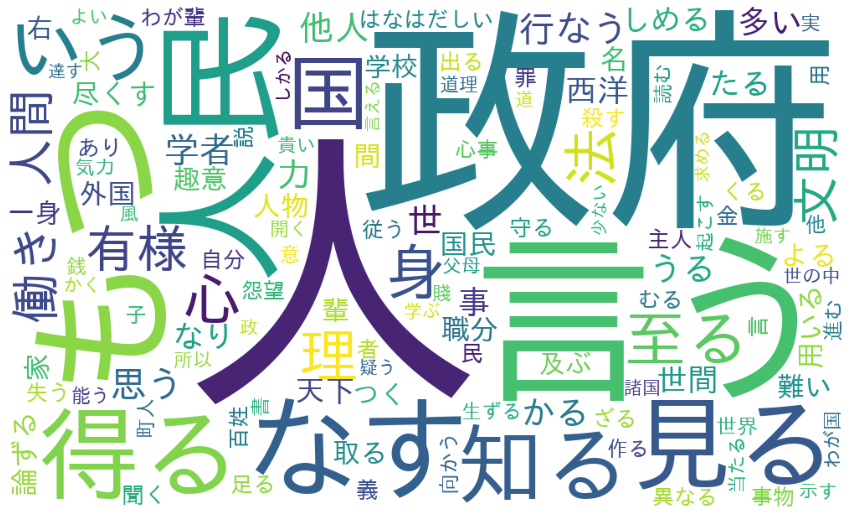

In [ ]:
#wordcloud取込用にresultを辞書型ヘ変換
dic_result = dict(result)

#Word Cloudで画像生成（#max_words, width, heightは任意設定）
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white',
                      max_words=125,
                      font_path='/usr/share/fonts/truetype/fonts-japanese-gothic.ttf',
                      width=1000,
                      height=600,
                      ).fit_words(dic_result)

#生成した画像の表示
import matplotlib.pyplot as plt 
from matplotlib import rcParams

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## **Word cloud in a donut shape**

In [ ]:
#画像データダウンロード（biwakoの画像リンクもあり。変更する場合は#調整）
import requests

url = "https://github.com/hima2b4/Word-Cloud/raw/main/donuts.png"
#url = "https://github.com/hima2b4/Word-Cloud/raw/main/biwa.png"

file_name = "donuts.png"
#file_name = "biwa.png"

response = requests.get(url)
image = response.content

with open(file_name, "wb") as f:
    f.write(image)

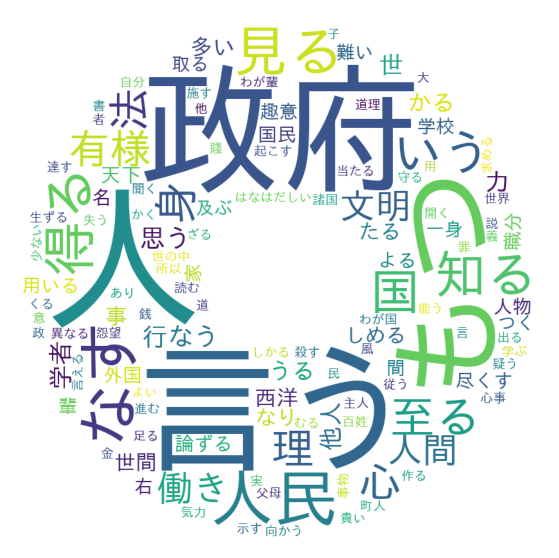

In [ ]:
#ライブラリインポート
from PIL import Image
import numpy as np

#Word Cloudで画像生成（#max_words, width, heightは任意設定）
custom_mask = np.array(Image.open('donuts.png'))
wordcloud = WordCloud(background_color='white',
                      max_words=125,
                      mask=custom_mask,
                      font_path='/usr/share/fonts/truetype/fonts-japanese-gothic.ttf',
                      width=1200,
                      height=1200
                      ).fit_words(dic_result)

#生成した画像の表示
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# **nlplot**
「nlplot」は、自然言語の可視化・分析できるライブラリです。
- N-gram bar chart, N-gram tree Map, Histogram of the word count, wordcloud, co-occurrence networks（共起ネットワーク）, sunburst chart（サンバースト）

https://www.takapy.work/entry/2020/05/17/192947

## **nlplot(uni-gram)**

In [ ]:
import nlplot

npt = nlplot.NLPlot(df_text, target_col='words')

# top_nで頻出上位単語, min_freqで頻出下位単語を指定できる
#stopwords = npt.get_stopword(top_n=0, min_freq=0)

npt.bar_ngram(
    title='uni-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=1,
    top_n=50,
#    stopwords=stopwords,
)

100%|██████████| 1545/1545 [00:00<00:00, 71182.83it/s]


## **nlplot(tree-map)**

In [ ]:
npt.treemap(
    title='Tree of Most Common Words',
    ngram=1,
    top_n=30,
#    stopwords=stopwords,
)

100%|██████████| 1545/1545 [00:00<00:00, 94717.61it/s]


## **nlplot(wordcloud)**

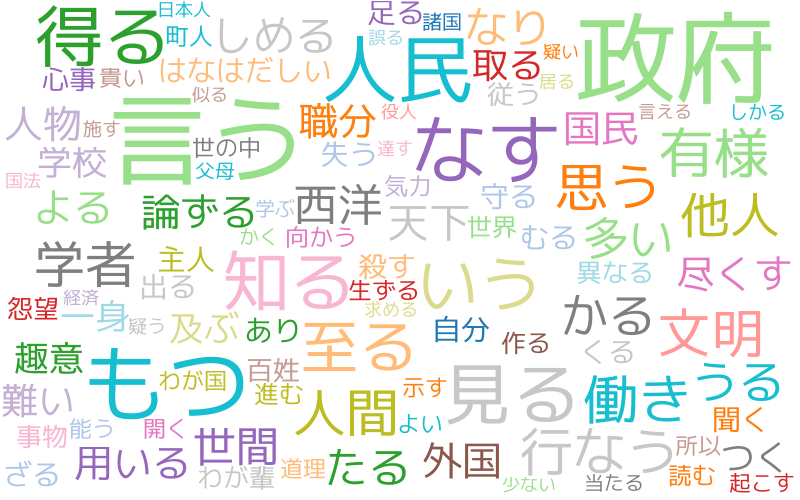

In [ ]:
npt.wordcloud(
    max_words=100,
    max_font_size=100,
    colormap='tab20_r',
#    stopwords=stopwords,
)

## **nlplot(word_distribution)**

In [ ]:
# 単語数の分布
npt.word_distribution(
    title='number of words distribution',
    xaxis_label='count',
)

## **nlplot(build_graph)**

In [ ]:
# ビルド（データ件数によっては処理に時間を要します）※ノードの数のみ変更
npt.build_graph(min_edge_frequency=1,
                #stopwords=stopwords,
                )

display(
    npt.node_df.head(), npt.node_df.shape,
    npt.edge_df.head(), npt.edge_df.shape
)

npt.co_network(
    title='Co-occurrence network',
)

## **nlplot(sunburst)**

In [ ]:
npt.sunburst(
    title='All sentiment sunburst chart',
    colorscale=True,
    color_continuous_scale='Oryel',
    width=800,
    height=600,
    #save=True
)

# **TF-IDF**
TF-IDF は ワードの重要度 を測るための指標の1つ。ワードの出現頻度とレア度が考慮された指標。TF、IDF、TF-IDF の定義は以下の通り。

\begin{eqnarray} TF(d,w) &=& \frac{文書d における語wの出現回数}{文書d における全語の出現回数の和}\\ IDF(w) &=& log(\frac{全文書数}{語w を含む文書数})\\ TFIDF(d,w) &=& TF(d,w) \times IDF(w) \end{eqnarray}

- sentence毎にTF-IDFを算出、sentence×wordマトリクスをcsv出力(tfidf.csv)します。
- [**参考**] 指定したsentenceのWord cloudを描きます。※sentenceは個別指定
- 文書全体でTF-IDFを算出した時のWord cloudも描きます。

In [ ]:
# ライブラリインポート
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDFのベクトル処理
vectorizer = TfidfVectorizer(use_idf=True)
tfidf = vectorizer.fit_transform(df_text['words'])

# TF-IDF値を「センテンス×ワード」マトリクスをデータフレーム化
df_tfidf = pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names(), index=df_text['words'])
display(df_tfidf)

,あいそ,あがめる,あきる,あける,あまた,あらし,あり,ありがたい,あるく,いう,いか,いくら,いざる,いたす,いたる,いだく,いだける,いちじるしい,いてる,いぬ,いも,いろは,いわく,うえ,うた,うつ,うてる,うる,うるむ,える,おける,おこし,おのおの,おもしろい,おりる,おろか,おん,お上,お姫様,お家,...,食らう,食客,食料,食物,食肉,飢寒,飲む,飼う,飼犬,飽く,飾り,飾る,養う,養子,養蚕,餓鬼,饑饉,馬鹿らしい,駁する,駆る,騒々しい,騒乱,驚かす,驚く,骨格,骨肉,骸骨,高い,高低,高利貸,高大,高尚,鬼神,鰥寡,麦飯,黒い,黒奴,黙す,鼻汁,鼻紙
words,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
初 天 人 人 造る 人 下 人 造る 言える,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
さる 天 人 生ずる 賤上 万物 霊 身 心 働き もつ 天地 間 もつ 衣食住 用 達す 人 妨げ なす 安楽 この世 渡る しめる 給う 趣意,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
広い 人間 世界 見渡す かしこい 人 おろか 人 貧しい 富める 貴人 下人 有様 雲 泥 似る,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333735,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
実 教 人 学ぶ 愚人,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
もつ 接す 交わる 書画 友 碁 将棋 相手 遊冶 悪事 友 会 方便,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
芸能 よい 茶 飲む よい,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.43421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
下りる 筋骨 腕 押す 枕 足 角力 一席 興 一助,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#「センテンス×ワード」形式のTF-IDFマトリクスをcsv出力（ローカルファイルに出力する場合はfiles.downloadの#外す）
from google.colab import files
df_tfidf.to_csv('tfidf.csv',encoding='utf_8_sig')
#files.download('tfidf.csv') 

https://zenn.dev/megane_otoko/articles/013_tf_idf_trial

## **Word Cloud with TF-IDF for each Sentence**
指定したsentenceのWord Cloudを表示しているだけなので参考程度。\
※tfidf_vec = vectorizer.fit_transform(df_text['words']).toarray()[0] ←この数値で描画したいsentenceを指定する。

In [ ]:
# 指定センテンスのTF-IDF計算(#toarray[]の数値でセンテンス指定)
tfidf_vec = vectorizer.fit_transform(df_text['words']).toarray()[0]
# TF-IDFを辞書化
tfidf_dict = dict(zip(vectorizer.get_feature_names(), tfidf_vec))
# 値が正のkeyだけ残す
tfidf_dict = {k: v for k, v in tfidf_dict.items() if v > 0}

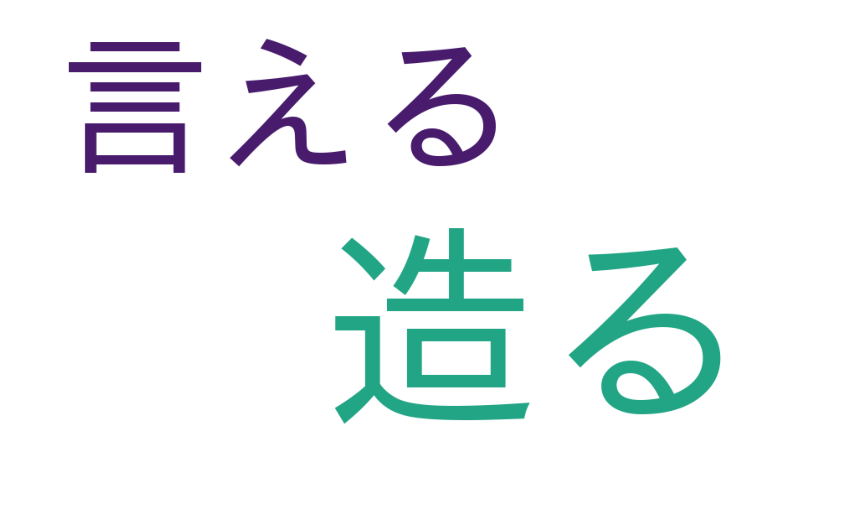

In [ ]:
#Word Cloudで画像生成（#max_words, width, heightは任意設定）
wordcloud = WordCloud(background_color='white',
                      max_words=125,
                      font_path='/usr/share/fonts/truetype/fonts-japanese-gothic.ttf',
                      width=1000,
                      height=600,
                      ).generate_from_frequencies(tfidf_dict)

#生成した画像の表示
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## **Word cloud with TF-IDF for All texts**

In [ ]:
# TF-IDF計算
tfidf_vec2 = vectorizer.fit_transform(df).toarray()[0]
# TF-IDFを辞書化
tfidf_dict2 = dict(zip(vectorizer.get_feature_names(), tfidf_vec2))
# 値が正のkeyだけ残す
tfidf_dict2 = {k: v for k, v in tfidf_dict2.items() if v > 0}

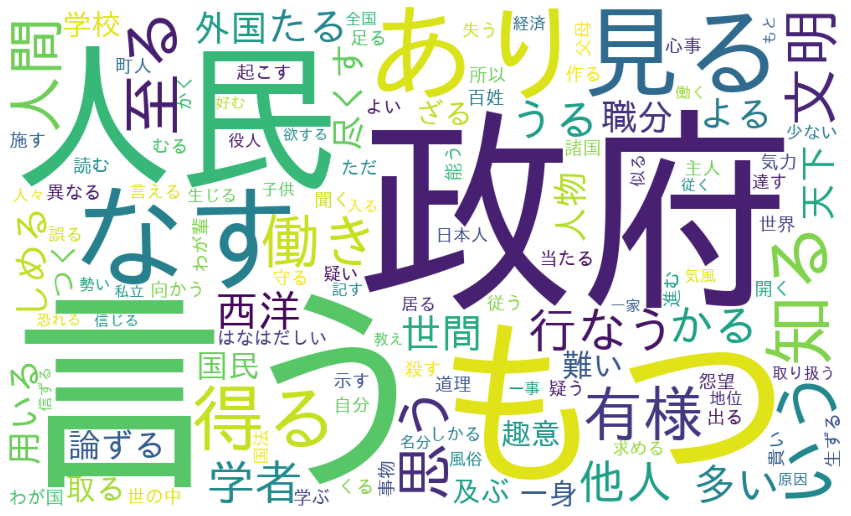

In [ ]:
#Word Cloudで画像生成（#max_words, width, heightは任意設定）
wordcloud = WordCloud(background_color='white',
                      max_words=125,
                      font_path='/usr/share/fonts/truetype/fonts-japanese-gothic.ttf',
                      width=1000,
                      height=600,
                      ).generate_from_frequencies(tfidf_dict2)

#生成した画像の表示
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# **Visualization of word2vec**

## **word2vecモジュール**

In [ ]:
from gensim.models import word2vec

# size : 中間層のニューロン数・数値に応じて配列の大きさが変わる。数値が多いほど精度が良くなりやすいが、処理が重くなる。
# min_count : この値以下の出現回数の単語を無視
# window : 対象単語を中心とした前後の単語数
# iter : epochs数
# sg : skip-gramを使うかどうか 0:CBOW 1:skip-gram

model = word2vec.Word2Vec(df_text['words2'],
                          size=200,
                          min_count=10,
                          window=5,
                          iter=20,
                          sg = 1)    # sg=1:skip-gram使用

#学習結果
print(model.wv.vectors.shape)  # 分散表現の形状
print(model.wv.vectors)  #分散表現の配列

(335, 200)
[[ 0.01241179 -0.04732293  0.09849412 ...  0.09883715  0.013219
  -0.1305943 ]
 [-0.0164899   0.00651398  0.14825574 ...  0.08205573 -0.03790284
  -0.05360758]
 [-0.01132252 -0.03985849  0.10568558 ...  0.07412232  0.01980353
  -0.1398855 ]
 ...
 [-0.00458742 -0.0026368   0.11050861 ...  0.08149035  0.0480819
  -0.13230252]
 [-0.01060255  0.01454677  0.14457962 ...  0.08829306  0.08172183
  -0.13105382]
 [-0.01437604  0.00483881  0.10810417 ...  0.06760138  0.05615286
  -0.1180009 ]]


In [ ]:
#ベクトル化したテキストの各語彙確認
model.wv.index2word

['人',
 '政府',
 '言う',
 'もつ',
 '人民',
 'なす',
 '見る',
 '得る',
 '知る',
 '国',
 'いう',
 '至る',
 '身',
 '理',
 '法',
 '心',
 '有様',
 '働き',
 '文明',
 '人間',
 '行なう',
 '思う',
 '世',
 '学者',
 '力',
 '他人',
 'かる',
 'うる',
 '多い',
 '西洋',
 '事',
 '世間',
 'たる',
 'なり',
 'しめる',
 '天下',
 '外国',
 'よる',
 '名',
 '用いる',
 '家',
 '尽くす',
 '人物',
 '職分',
 '論ずる',
 '国民',
 '間',
 '難い',
 '取る',
 '輩',
 '趣意',
 '及ぶ',
 '一身',
 '右',
 'つく',
 '学校',
 'はなはだしい',
 '主人',
 '自分',
 '足る',
 '守る',
 '金',
 '出る',
 'ざる',
 '殺す',
 '民',
 'あり',
 'むる',
 '言',
 '聞く',
 '失う',
 '説',
 '用',
 '大',
 '者',
 'くる',
 '罪',
 '義',
 '百姓',
 '子',
 '従う',
 '心事',
 '異なる',
 'わが輩',
 '事物',
 '怨望',
 '世界',
 '作る',
 '進む',
 '他',
 '向かう',
 '生ずる',
 '実',
 '町人',
 '読む',
 '書',
 '意',
 '銭',
 '気力',
 '世の中',
 '貴い',
 '賤',
 'よい',
 '道理',
 'わが国',
 '示す',
 '開く',
 '能う',
 '所以',
 '起こす',
 '当たる',
 'かく',
 '父母',
 '学ぶ',
 '諸国',
 '道',
 'しかる',
 '政',
 '風',
 '施す',
 '疑う',
 '言える',
 '達す',
 '少ない',
 '求める',
 '国法',
 '形',
 '誤る',
 '日本人',
 '居る',
 '疑い',
 '似る',
 '役人',
 '経済',
 '風俗',
 '命',
 '人々',
 '地位',
 '生じる',
 '子供',
 '恐れる',
 '取り扱う',
 '古',
 '勢い',
 '

In [ ]:
#matplotlib日本語化
!pip install japanize-matplotlib

## **PCA可視化**

In [ ]:
#PCA実行
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
values = pca.fit_transform(model.wv.vectors)
#print(values.shape)
#print(values)

<Figure size 432x288 with 0 Axes>

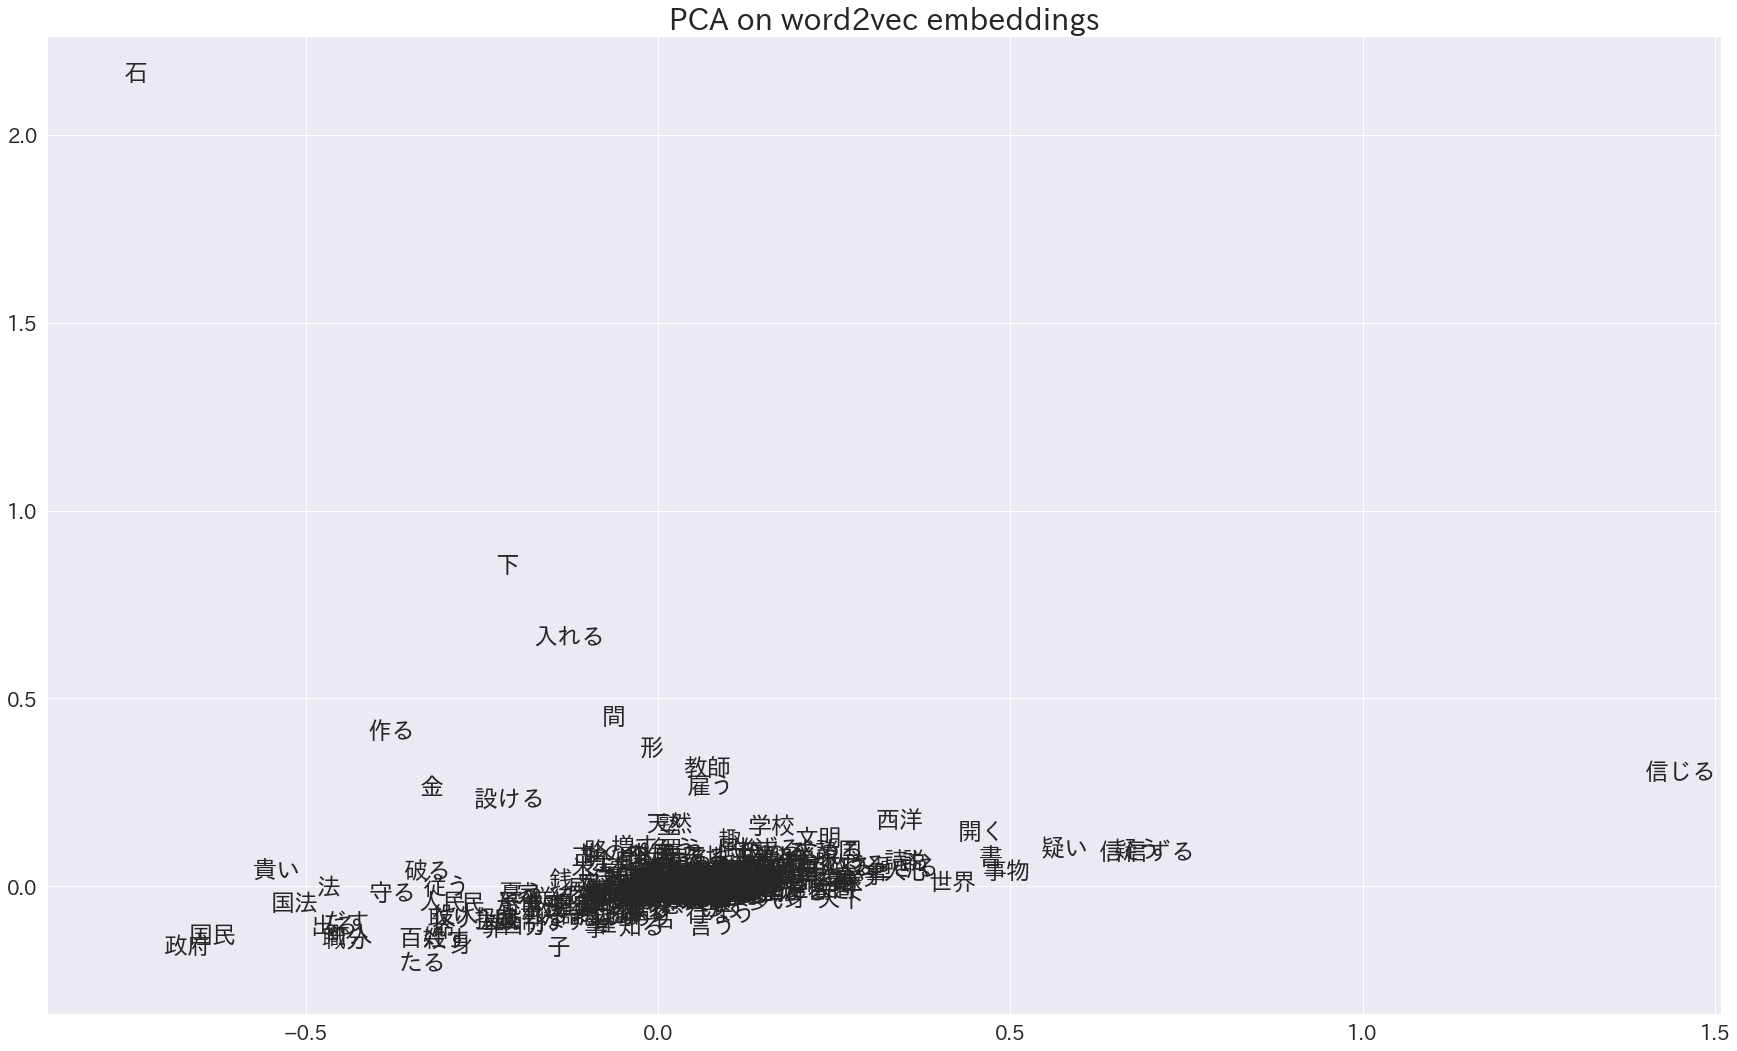

In [ ]:
#PCA可視化
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

sns.set(font="IPAexGothic")
plt.rcParams["font.size"] = 24
plt.tight_layout()
fig = plt.figure(figsize=(30,18))
for value, word in zip(values, model.wv.index2word):
    plt.plot(value[0], value[1], marker='')
    plt.annotate(word, (value[0], value[1]))
    plt.title('PCA on word2vec embeddings', fontsize=30)
    #plt.xlim(-0.02,0.04)
    #plt.ylim(-0.02,0.04)
    plt.xticks(fontsize= 20)
    plt.yticks(fontsize= 20)
plt.show()

https://axross-recipe.com/recipes/34

## **t-SNE可視化**

In [ ]:
#t-SNE実行
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
values2 = tsne.fit_transform(model.wv.vectors)

<Figure size 432x288 with 0 Axes>

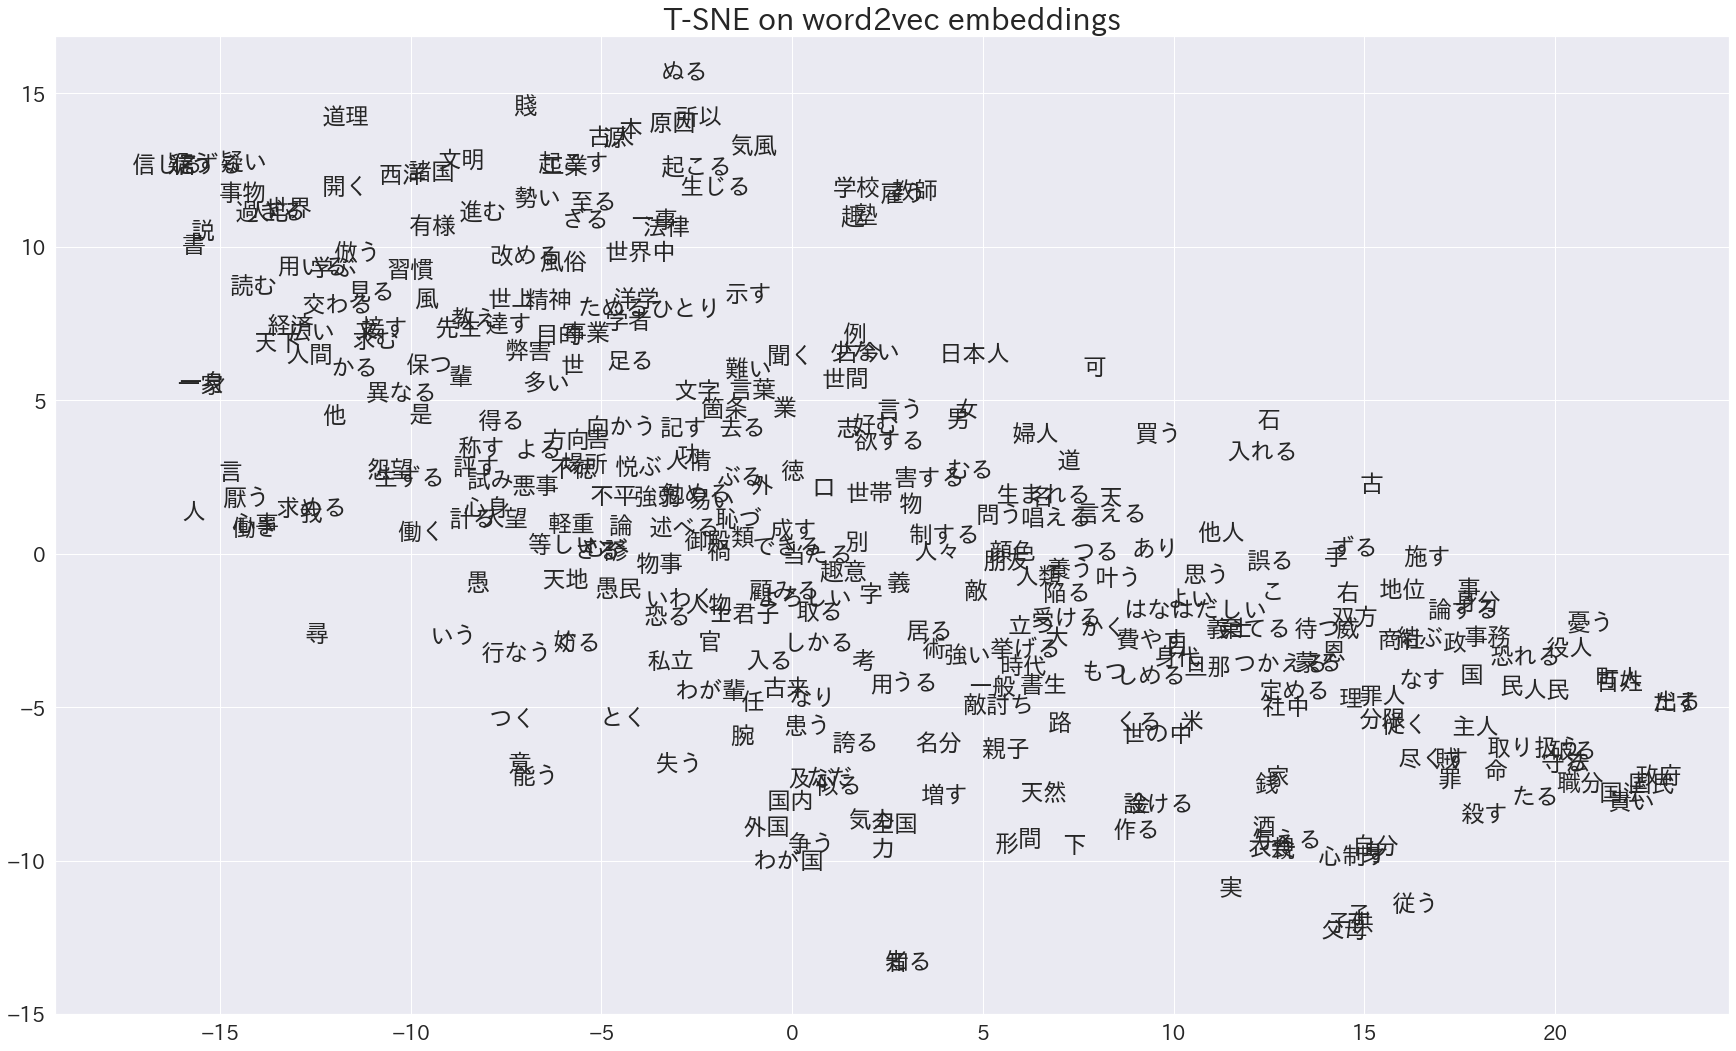

In [ ]:
#t-SNE可視化
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

sns.set(font="IPAexGothic")
plt.rcParams["font.size"] = 24
plt.tight_layout()
fig = plt.figure(figsize=(30,18))
for value, word in zip(values2, model.wv.index2word):
    plt.plot(value[0], value[1], marker='')
    plt.annotate(word, (value[0], value[1]))
    plt.title('t-SNE on word2vec embeddings', fontsize=30)
    #plt.xlim(-0.02,0.04)
    #plt.ylim(-0.02,0.04)
    plt.xticks(fontsize= 20)
    plt.yticks(fontsize= 20)
plt.show()

https://data-analytics.fun/2020/03/12/word2vec/